# Import Libraries and Load Data

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("cardio_train.csv", sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# Missing Values Check

In [3]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

# Remove Duplicate Rows

In [4]:
df = df.drop_duplicates()
df.shape

(70000, 13)

# Convert Age into Years.

In [5]:
df['age'] = (df['age'] / 365).astype(int)

# Create new BMI Column.

In [6]:
df['bmi'] = df['weight'] / ((df['height']/100) ** 2)

# To detect Outliers, First Check Extreme Values.

In [7]:
print(df['ap_hi'].describe())
print(df['ap_lo'].describe())

count    70000.000000
mean       128.817286
std        154.011419
min       -150.000000
25%        120.000000
50%        120.000000
75%        140.000000
max      16020.000000
Name: ap_hi, dtype: float64
count    70000.000000
mean        96.630414
std        188.472530
min        -70.000000
25%         80.000000
50%         80.000000
75%         90.000000
max      11000.000000
Name: ap_lo, dtype: float64


# Remove Impossible Blood Pressure Values

In [8]:
df = df[(df['ap_hi'] <= 200) & (df['ap_hi'] >= 80)]
df = df[(df['ap_lo'] <= 120) & (df['ap_lo'] >= 40)]
df = df[df['ap_hi'] > df['ap_lo']]

# Remove Incorrect BMI Values

In [9]:
df = df[(df['bmi'] >= 15) & (df['bmi'] <= 50)]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68325 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           68325 non-null  int64  
 1   age          68325 non-null  int64  
 2   gender       68325 non-null  int64  
 3   height       68325 non-null  int64  
 4   weight       68325 non-null  float64
 5   ap_hi        68325 non-null  int64  
 6   ap_lo        68325 non-null  int64  
 7   cholesterol  68325 non-null  int64  
 8   gluc         68325 non-null  int64  
 9   smoke        68325 non-null  int64  
 10  alco         68325 non-null  int64  
 11  active       68325 non-null  int64  
 12  cardio       68325 non-null  int64  
 13  bmi          68325 non-null  float64
dtypes: float64(2), int64(12)
memory usage: 7.8 MB


# Ensure Category of Categorical Feature Column

In [11]:
categorical_cols = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
df[categorical_cols] = df[categorical_cols].astype('category')
df[categorical_cols].dtypes

gender         category
cholesterol    category
gluc           category
smoke          category
alco           category
active         category
dtype: object

# Define Numerical Features

In [12]:
num_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi']

# EDA: Exploratory Data Analysis

# 1) Distribution of Age

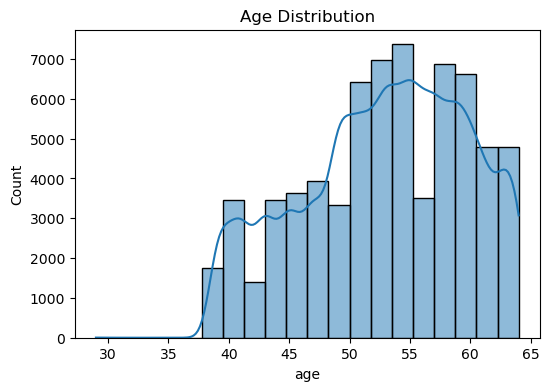

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.histplot(df['age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

# 2) Gender Count

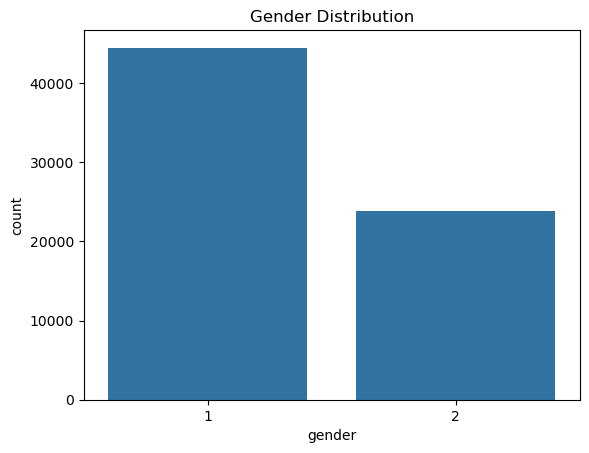

In [14]:
sns.countplot(x='gender', data=df)
plt.title("Gender Distribution")
plt.show()

# 3) Correlation Heatmap

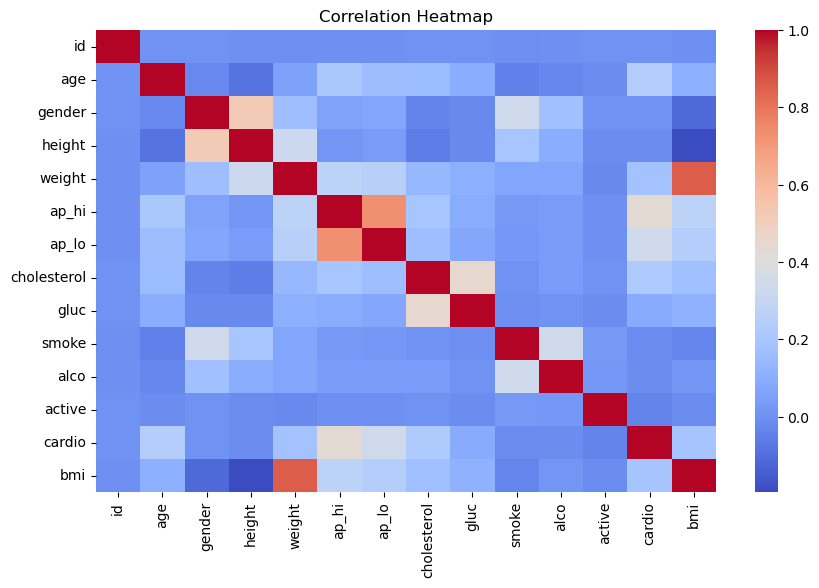

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# 4) Boxplot for Outliers

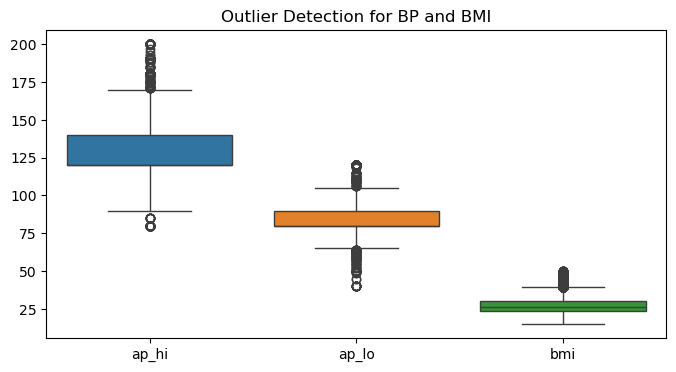

In [16]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df[['ap_hi', 'ap_lo', 'bmi']])
plt.title("Outlier Detection for BP and BMI")
plt.show()

# 5) Cholesterol vs Disease

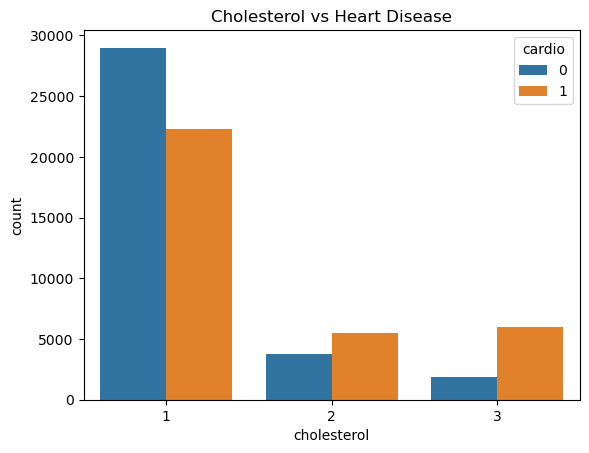

In [17]:
sns.countplot(x='cholesterol', hue='cardio', data=df)
plt.title("Cholesterol vs Heart Disease")
plt.show()

# 6) Age vs Disease 

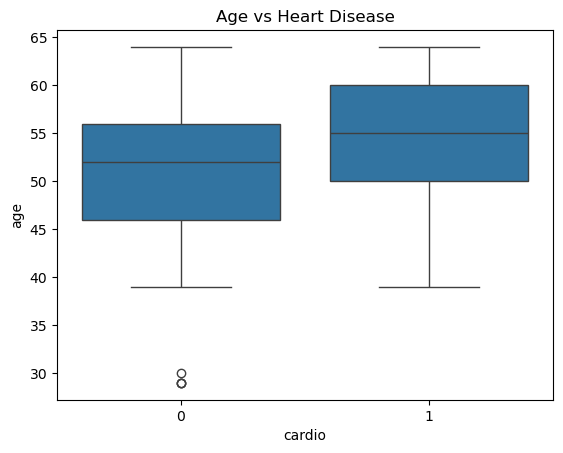

In [18]:
sns.boxplot(x='cardio', y='age', data=df)
plt.title("Age vs Heart Disease")
plt.show()

# Save Cleaned Dataset

In [19]:
df.to_csv("cleaned_cardio.csv", index=False)